## Facebook Comments Predictor

This project is about predicting the number of comments on a specific post for the next hour in Facebook

It has totally 54 attributes:

53 features which will be the input of the model

1 target which will be the output of the model 

The algorithm used in this model is RandomForestRegressor()


Since it is a Regression problem and after testing the model through various algorithms, this was choosed.



## Attributes Information:

1 Page Popularity/likes - POPL - Defines the popularity or support for the source of the document.

2 Page Checkin - IND - Describes how many individuals so far visited this place. This feature is only associated with the places eg:some institution, place, theater etc.

3 Page talking about - INTIND - Defines the daily interest of individuals towards source of the document/ Post. The people who actually come back to the page, after liking the page. This include activities such as comments, likes to a post, shares, etc by visitors to the page.

4 Page Category - CAT - Defines the category of the source of the document eg: place, institution, brand etc.

5 - 29 Derived - (P1-P25) - These features are aggregated by page, by calculating min, max, average, median and standard deviation of essential features.

30 CC1 - TCMTS - The total number of comments before selected base date/time.

31 CC2 - CMT24 - The number of comments in last 24 hours, relative to base date/time.

32 CC3 - CMT2D - The number of comments in last 48 to last 24 hours relative to base date/time.

33 CC4 - CMT1D - The number of comments in the first 24 hours after the publication of post but before base date/time.

34 CC5 - C24-C2D - The difference between TCMTS and CMT24.

35 Base time - SST - Selected time in order to simulate the scenario.

36 Post length - CCIP - Character count in the post.

37 Post Share Count - SHD - This features counts the no of shares of the post, that how many peoples had shared this post on to their timeline.

38 Post Promotion Status - NWFD - To reach more people with posts in News Feed, individual promote their post and this features tells that whether the post is promoted(1) or not(0).

39 Hours Local - HOURS - This describes the Hours hrs, for which we have the target variable/ comments received.

40-46 Post published weekday - (PPW1-PPW7) - This represents the day(Sunday...Saturday) on which the post was published.

47-53 Base DateTime weekday - (BDT1-BDT7) - This represents the day(Sunday...Saturday) on selected base Date/Time.

54 Target Variable - TARGET - The no of comments in next Hours hrs(Hours is given in Feature no 39).

## Model

In [1]:
import pandas as pd

In [2]:
fb_train = pd.read_csv("train_data.csv")
fb_test = pd.read_csv("test_data.csv")

In [3]:
fb_train.head()

,POPL,IND,INTIND,CAT,P1,P2,P3,P4,P5,P6,...,PPW6,PPW7,BDT1,BDT2,BDT3,BDT4,BDT5,BDT6,BDT7,TARGET
0,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
fb_train.describe()

,POPL,IND,INTIND,CAT,P1,P2,P3,P4,P5,P6,...,PPW6,PPW7,BDT1,BDT2,BDT3,BDT4,BDT5,BDT6,BDT7,TARGET
count,4.094900e+04,40949.000000,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,...,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,1.313814e+06,4676.133752,4.480025e+04,24.254780,1.586241,443.333854,55.720384,35.645535,67.464151,0.219468,...,0.146157,0.136926,0.141640,0.132506,0.137635,0.148599,0.150846,0.143886,0.144888,7.322889
std,6.785752e+06,20593.184863,1.109338e+05,19.950583,20.753174,496.695198,86.933548,69.960232,81.568249,10.055146,...,0.353268,0.343774,0.348684,0.339045,0.344520,0.355698,0.357903,0.350979,0.351992,35.494550
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,45.000000,5.527273,2.000000,8.278756,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,0.000000,241.000000,23.374101,12.000000,35.069140,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,717.000000,71.828829,42.000000,102.554953,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,2341.000000,2341.000000,2341.000000,2341.000000,731.394558,1923.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1305.000000


In [5]:
fb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 54 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   POPL     40949 non-null  int64  
 1   IND      40949 non-null  int64  
 2   INTIND   40949 non-null  int64  
 3   CAT      40949 non-null  int64  
 4   P1       40949 non-null  int64  
 5   P2       40949 non-null  int64  
 6   P3       40949 non-null  float64
 7   P4       40949 non-null  float64
 8   P5       40949 non-null  float64
 9   P6       40949 non-null  int64  
 10  P7       40949 non-null  int64  
 11  P8       40949 non-null  float64
 12  P9       40949 non-null  float64
 13  P10      40949 non-null  float64
 14  P11      40949 non-null  int64  
 15  P12      40949 non-null  int64  
 16  P13      40949 non-null  float64
 17  P14      40949 non-null  float64
 18  P15      40949 non-null  float64
 19  P16      40949 non-null  int64  
 20  P17      40949 non-null  int64  
 21  P18      409

In [6]:
fb_train['TARGET'].value_counts()

0      22579
1       5194
2       2624
3       1583
4       1171
       ...  
209        1
145        1
720        1
496        1
336        1
Name: TARGET, Length: 361, dtype: int64

In [7]:
import matplotlib.pyplot as plt

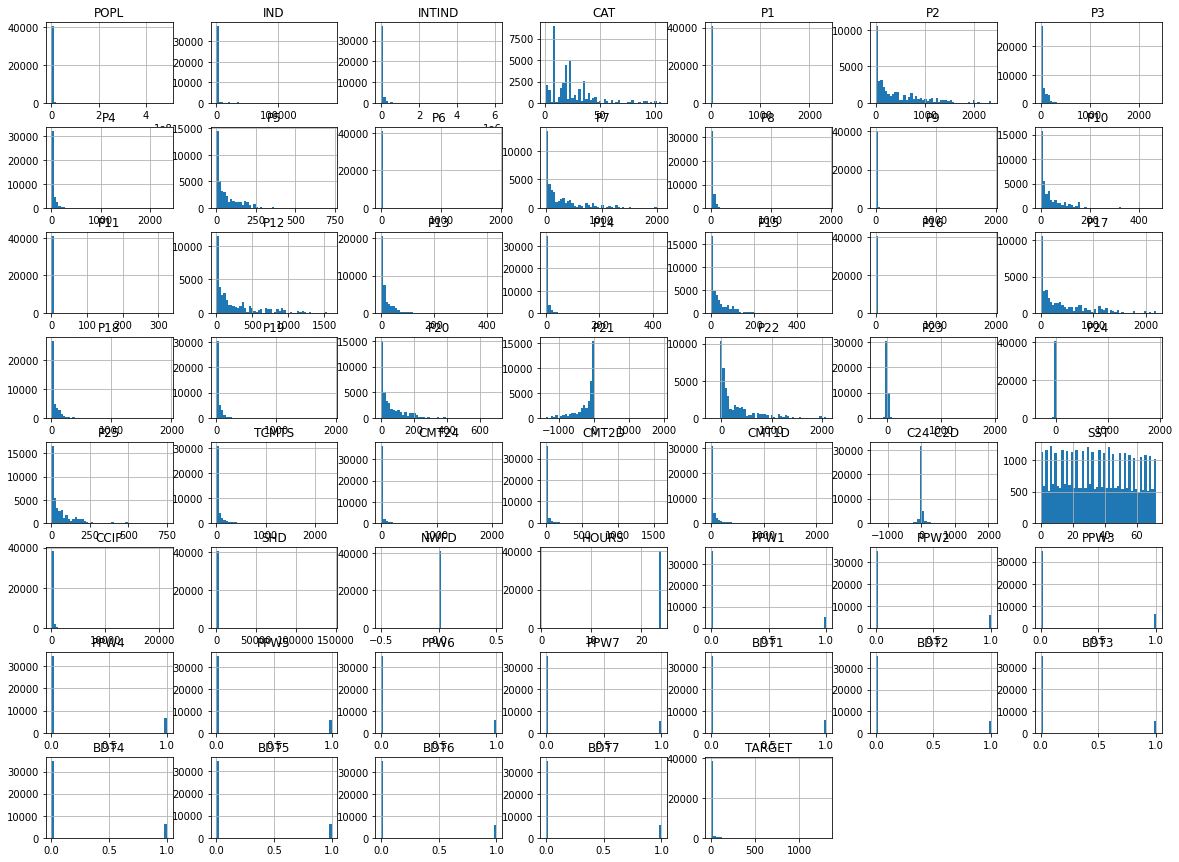

In [8]:
fb_train.hist(bins=50 , figsize=(20,15))
plt.show()

In [9]:
corr_matrix = fb_train.corr()

corr_matrix['TARGET'].sort_values(ascending = False)

TARGET     1.000000
CMT24      0.528696
C24-C2D    0.378453
P8         0.344827
CMT1D      0.341741
P3         0.334986
P18        0.333990
TCMTS      0.326882
P4         0.325367
P19        0.324373
P13        0.317867
P9         0.309461
P25        0.308800
P5         0.300229
P10        0.297203
P15        0.296790
P20        0.295221
P14        0.276432
P2         0.231432
P12        0.229884
P17        0.225908
P7         0.217754
P22        0.213866
INTIND     0.177330
P16        0.164300
P23        0.162492
P1         0.156940
SHD        0.139295
P6         0.103345
CMT2D      0.072088
POPL       0.058918
IND        0.022982
PPW4       0.021169
BDT4       0.017299
HOURS      0.012584
P11        0.011900
BDT5       0.007104
PPW1       0.001449
PPW3       0.001263
BDT3      -0.000131
BDT2      -0.000266
CCIP      -0.000622
BDT6      -0.001383
PPW2      -0.003071
PPW5      -0.004486
PPW6      -0.005043
BDT7      -0.010611
PPW7      -0.012229
BDT1      -0.012447
P24       -0.019504


In [10]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='TARGET', ylabel='TARGET'>,
        <AxesSubplot:xlabel='CMT24', ylabel='TARGET'>,
        <AxesSubplot:xlabel='SST', ylabel='TARGET'>],
       [<AxesSubplot:xlabel='TARGET', ylabel='CMT24'>,
        <AxesSubplot:xlabel='CMT24', ylabel='CMT24'>,
        <AxesSubplot:xlabel='SST', ylabel='CMT24'>],
       [<AxesSubplot:xlabel='TARGET', ylabel='SST'>,
        <AxesSubplot:xlabel='CMT24', ylabel='SST'>,
        <AxesSubplot:xlabel='SST', ylabel='SST'>]], dtype=object)

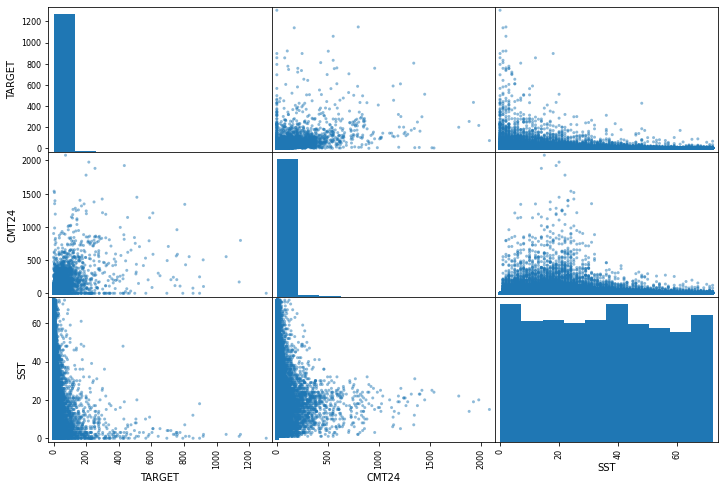

In [11]:
atr = ['TARGET','CMT24','SST']
scatter_matrix(fb_train[atr],figsize=(12,8))

<AxesSubplot:xlabel='TARGET', ylabel='CMT24'>

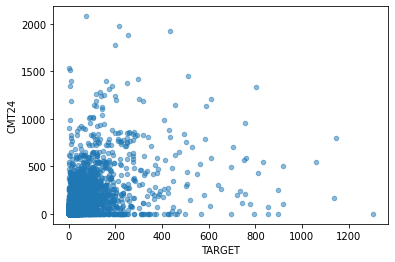

In [12]:
fb_train.plot(kind="scatter",x='TARGET',y='CMT24',alpha=0.5)

In [13]:
fb_train_f = fb_train.drop('TARGET',axis=1)
fb_train_l = fb_train['TARGET']

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(fb_train_f)

SimpleImputer(strategy='median')

In [15]:
imputer.statistics_

array([ 2.92911000e+05,  0.00000000e+00,  7.04500000e+03,  1.80000000e+01,
        0.00000000e+00,  2.41000000e+02,  2.33741007e+01,  1.20000000e+01,
        3.50691399e+01,  0.00000000e+00,  1.18000000e+02,  8.43750000e+00,
        2.00000000e+00,  1.73827088e+01,  0.00000000e+00,  1.16000000e+02,
        8.58426966e+00,  1.00000000e+00,  1.86399842e+01,  0.00000000e+00,
        2.24000000e+02,  2.18593750e+01,  1.20000000e+01,  3.23688481e+01,
       -9.20000000e+01,  1.09000000e+02,  2.73809524e-01,  0.00000000e+00,
        2.55471717e+01,  1.10000000e+01,  2.00000000e+00,  0.00000000e+00,
        1.00000000e+01,  0.00000000e+00,  3.50000000e+01,  9.70000000e+01,
        1.30000000e+01,  0.00000000e+00,  2.40000000e+01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [16]:
x = imputer.transform(fb_train_f)
fb_train_tr = pd.DataFrame(x, columns=fb_train_f.columns)
fb_train_tr.describe()

,POPL,IND,INTIND,CAT,P1,P2,P3,P4,P5,P6,...,PPW5,PPW6,PPW7,BDT1,BDT2,BDT3,BDT4,BDT5,BDT6,BDT7
count,4.094900e+04,40949.000000,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,...,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,1.313814e+06,4676.133752,4.480025e+04,24.254780,1.586241,443.333854,55.720384,35.645535,67.464151,0.219468,...,0.144033,0.146157,0.136926,0.141640,0.132506,0.137635,0.148599,0.150846,0.143886,0.144888
std,6.785752e+06,20593.184863,1.109338e+05,19.950583,20.753174,496.695198,86.933548,69.960232,81.568249,10.055146,...,0.351127,0.353268,0.343774,0.348684,0.339045,0.344520,0.355698,0.357903,0.350979,0.351992
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,45.000000,5.527273,2.000000,8.278756,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,0.000000,241.000000,23.374101,12.000000,35.069140,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,717.000000,71.828829,42.000000,102.554953,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,2341.000000,2341.000000,2341.000000,2341.000000,731.394558,1923.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler' , StandardScaler())
])

In [18]:
fb_train_tr = my_pipeline.fit_transform(fb_train)

In [19]:
fb_train_tr

array([[-0.10003712, -0.22707468, -0.39967795, ..., -0.40996237,
         2.42938358, -0.20631277],
       [-0.10003712, -0.22707468, -0.39967795, ...,  2.43924827,
        -0.41162705, -0.20631277],
       [-0.10003712, -0.22707468, -0.39967795, ..., -0.40996237,
         2.42938358, -0.20631277],
       ...,
       [ 0.86303905, -0.22367546,  4.07635256, ..., -0.40996237,
        -0.41162705,  1.82219244],
       [ 0.86303905, -0.22367546,  4.07635256, ...,  2.43924827,
        -0.41162705,  0.58255037],
       [ 0.86303905, -0.22367546,  4.07635256, ...,  2.43924827,
        -0.41162705,  0.10359775]])

In [20]:
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

#model = LinearRegression()

#model = DecisionTreeRegressor()

model = RandomForestRegressor()

In [21]:
model.fit(fb_train_tr , fb_train_l)

RandomForestRegressor()

In [22]:
some_data = fb_test.iloc[:10000]
some_labels = fb_test.iloc[:10000]

prepared_data = my_pipeline.transform(some_data)

model.predict(prepared_data)

array([1., 0., 0., ..., 0., 0., 1.])

In [23]:
list(some_labels)

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'AA',
 'AB',
 'AC',
 'AD',
 'AE',
 'AF',
 'AG',
 'AH',
 'AI',
 'AJ',
 'AK',
 'AL',
 'AM',
 'AN',
 'AO',
 'AP',
 'AQ',
 'AR',
 'AS',
 'AT',
 'AU',
 'AV',
 'AW',
 'AX',
 'AY',
 'AZ',
 'BA',
 'BB']

In [24]:
from sklearn.metrics import mean_squared_error

import numpy as np

fb_predictions = model.predict(fb_train_tr) 

lin_mse = mean_squared_error(fb_train_l , fb_predictions)

lin_rmse = np.sqrt(lin_mse)

In [25]:
lin_rmse

0.6155803586875596

In [26]:
from joblib import dump, load

In [27]:
dump(model,"FB.joblib")

['FB.joblib']

In [28]:
x_test = fb_train
y_test = fb_train_l
x_test_prepared = my_pipeline.transform(x_test)
finalpredictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test,finalpredictions)
final_rmse = np.sqrt(final_mse) 

In [29]:
final_rmse

0.6155803586875596

## Testing Data

Enter the Row-Number of the testing data in variable 'y' 

In [38]:
y = 5641
prepared_data[y-2]

array([-1.67834412e-01, -2.27074679e-01, -2.28564800e-01, -1.01525994e+00,
        1.06208551e+01,  2.46163257e+00,  6.70094276e+00,  4.24324051e+00,
        6.47871849e+00,  2.20566908e+01,  3.68770179e+00,  1.66818259e+01,
        1.49228104e+01,  1.02334336e+01, -1.21650998e-02, -8.20517328e-01,
       -6.31950057e-01, -3.71559073e-01, -7.61691983e-01,  1.17819848e+01,
        2.64748573e+00,  7.20643253e+00,  4.51167611e+00,  6.97302661e+00,
        1.56859392e+00,  3.72488410e+00,  3.62339223e+01,  2.27245346e+01,
        7.31706708e+00,  1.21394992e+00,  2.59082921e+00, -2.76453571e-01,
        1.32134954e+00,  2.32971116e+00, -1.64089865e+00, -3.60528744e-01,
       -8.38626789e-02,  0.00000000e+00,  1.20932489e-01, -3.73366947e-01,
       -4.08986592e-01, -4.19667560e-01, -4.32351172e-01,  2.43779859e+00,
       -4.13734295e-01, -3.98308631e-01, -4.06216453e-01, -3.90827466e-01,
       -3.99501289e-01, -4.17774266e-01,  2.37260824e+00, -4.09962370e-01,
       -4.11627051e-01,  

Copy the above data and paste it in the input of the Facebook_Comments_Predictor document